<a href="https://colab.research.google.com/github/gye152/ML---Hiyerarsik-Kumeleme-/blob/main/notebooks/Hiyerar%C5%9FikK%C3%BCmeleme/Hiyerar%C5%9Fik_k%C3%BCmele.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import datetime as dt
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
df = pd.read_csv('flo_data_20k.csv')

df.head()


,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.00,1.00,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.00,2.00,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.00,2.00,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.00,1.00,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.00,1.00,49.99,159.99,[AKTIFSPOR]


In [ ]:
df.shape

(19945, 12)

In [ ]:
df.isnull().sum()

,0
master_id,0
order_channel,0
last_order_channel,0
first_order_date,0
last_order_date,0
last_order_date_online,0
last_order_date_offline,0
order_num_total_ever_online,0
order_num_total_ever_offline,0
customer_value_total_ever_offline,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   master_id                          19945 non-null  object 
 1   order_channel                      19945 non-null  object 
 2   last_order_channel                 19945 non-null  object 
 3   first_order_date                   19945 non-null  object 
 4   last_order_date                    19945 non-null  object 
 5   last_order_date_online             19945 non-null  object 
 6   last_order_date_offline            19945 non-null  object 
 7   order_num_total_ever_online        19945 non-null  float64
 8   order_num_total_ever_offline       19945 non-null  float64
 9   customer_value_total_ever_offline  19945 non-null  float64
 10  customer_value_total_ever_online   19945 non-null  float64
 11  interested_in_categories_12        19945 non-null  obj

In [ ]:
datetime = ['first_order_date', 'last_order_date', 'last_order_date_online', 'last_order_date_offline']
for i in datetime:
    df[i] = pd.to_datetime(df[i])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   master_id                          19945 non-null  object        
 1   order_channel                      19945 non-null  object        
 2   last_order_channel                 19945 non-null  object        
 3   first_order_date                   19945 non-null  datetime64[ns]
 4   last_order_date                    19945 non-null  datetime64[ns]
 5   last_order_date_online             19945 non-null  datetime64[ns]
 6   last_order_date_offline            19945 non-null  datetime64[ns]
 7   order_num_total_ever_online        19945 non-null  float64       
 8   order_num_total_ever_offline       19945 non-null  float64       
 9   customer_value_total_ever_offline  19945 non-null  float64       
 10  customer_value_total_ever_online  

In [ ]:
df.describe(include=np.float64).T

,count,mean,std,min,25%,50%,75%,max
order_num_total_ever_online,19945.00,3.11,4.23,1.00,1.00,2.00,4.00,200.00
order_num_total_ever_offline,19945.00,1.91,2.06,1.00,1.00,1.00,2.00,109.00
customer_value_total_ever_offline,19945.00,253.92,301.53,10.00,99.99,179.98,319.97,18119.14
customer_value_total_ever_online,19945.00,497.32,832.60,12.99,149.98,286.46,578.44,45220.13


In [ ]:
today_date = dt.datetime(2021,6,1)

df["recency"] = (today_date - df["last_order_date"]).dt.days

df["tenure"] = (df["last_order_date"] - df["first_order_date"]).dt.days

# Toplam sipariş ve toplam harcama
df["order_num_total"] = df["order_num_total_ever_online"] + df["order_num_total_ever_offline"]
df["customer_value_total"] = df["customer_value_total_ever_online"] + df["customer_value_total_ever_offline"]

# Purchase Frequency (purchase_frequency = total_orders / tenure)
df["purchase_frequency"] = df["order_num_total"] / (df["tenure"] + 1)

# Intensity (intensity = total_orders / recency)
df["intensity"] = df["order_num_total"] / (df["recency"] + 1)

df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,recency,tenure,order_num_total,customer_value_total,purchase_frequency,intensity
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.00,1.00,139.99,799.38,[KADIN],95,119,5.00,939.37,0.04,0.05
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.00,2.00,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",105,1469,21.00,2013.55,0.01,0.20
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.00,2.00,189.97,395.35,"[ERKEK, KADIN]",186,366,5.00,585.32,0.01,0.03
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.00,1.00,39.99,81.98,"[AKTIFCOCUK, COCUK]",135,11,2.00,121.97,0.17,0.01
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.00,1.00,49.99,159.99,[AKTIFSPOR],86,582,2.00,209.98,0.00,0.02


In [ ]:
df_copy = df.copy()

df_copy.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,recency,tenure,order_num_total,customer_value_total,purchase_frequency,intensity
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.00,1.00,139.99,799.38,[KADIN],95,119,5.00,939.37,0.04,0.05
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.00,2.00,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",105,1469,21.00,2013.55,0.01,0.20
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.00,2.00,189.97,395.35,"[ERKEK, KADIN]",186,366,5.00,585.32,0.01,0.03
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.00,1.00,39.99,81.98,"[AKTIFCOCUK, COCUK]",135,11,2.00,121.97,0.17,0.01
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.00,1.00,49.99,159.99,[AKTIFSPOR],86,582,2.00,209.98,0.00,0.02


In [ ]:
df_copy.drop(["order_num_total_ever_online", "order_num_total_ever_offline", "customer_value_total_ever_offline", "customer_value_total_ever_online"], axis=1, inplace=True)

df_copy.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,interested_in_categories_12,recency,tenure,order_num_total,customer_value_total,purchase_frequency,intensity
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,[KADIN],95,119,5.00,939.37,0.04,0.05
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",105,1469,21.00,2013.55,0.01,0.20
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,"[ERKEK, KADIN]",186,366,5.00,585.32,0.01,0.03
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,"[AKTIFCOCUK, COCUK]",135,11,2.00,121.97,0.17,0.01
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,[AKTIFSPOR],86,582,2.00,209.98,0.00,0.02


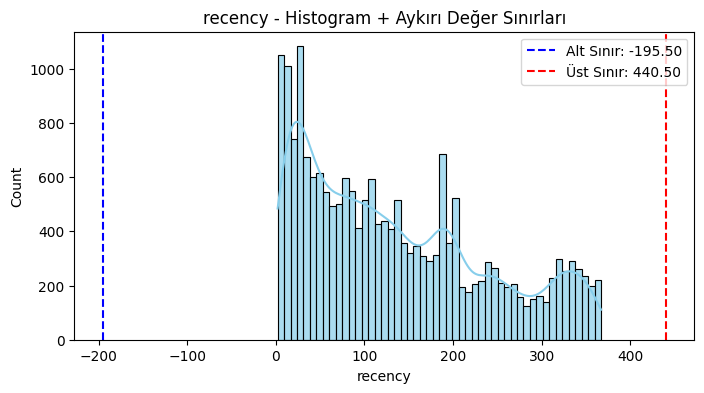


▶ recency: 0 aykırı değer bulundu.


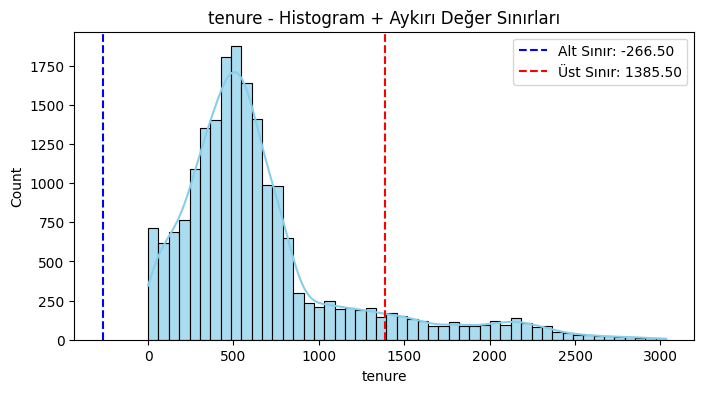


▶ tenure: 2048 aykırı değer bulundu.
Örnek aykırı değerler: [1469 2145 2828 1680 1783 2493 1498 1623 1799 2477] ...



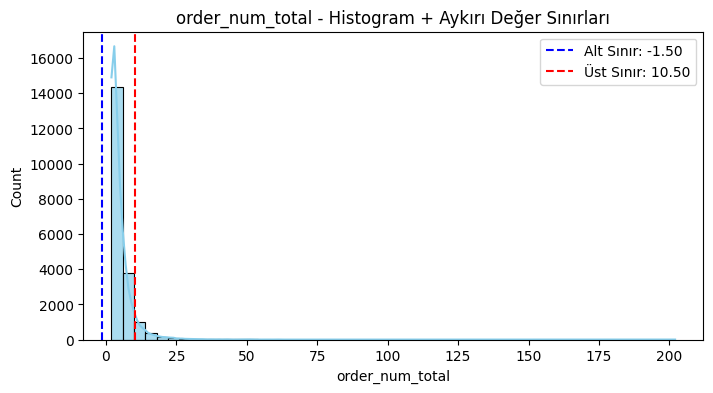


▶ order_num_total: 1399 aykırı değer bulundu.
Örnek aykırı değerler: [21. 20. 24. 15. 13. 13. 37. 13. 21. 13.] ...



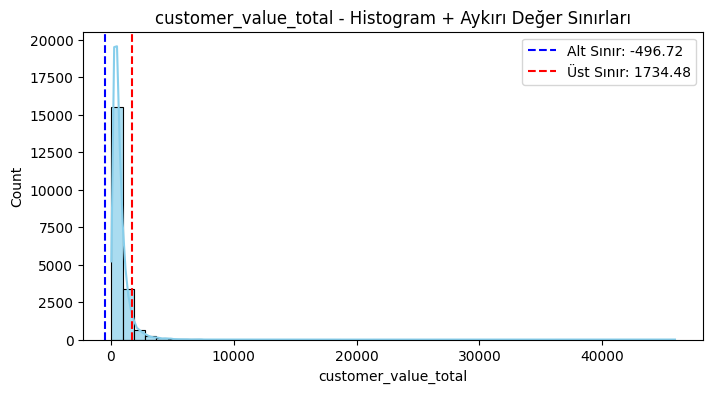


▶ customer_value_total: 1275 aykırı değer bulundu.
Örnek aykırı değerler: [ 2013.55  2861.6   4413.29  2930.34  2038.65  2147.96  2254.44  2037.51
 12726.1   3364.53] ...



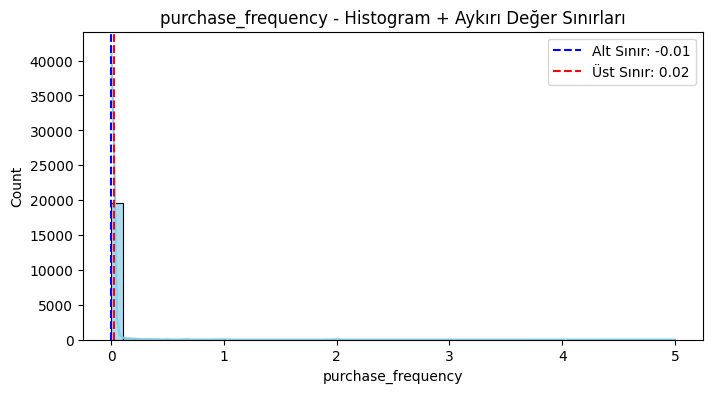


▶ purchase_frequency: 1734 aykırı değer bulundu.
Örnek aykırı değerler: [0.04166667 0.16666667 0.28571429 0.02711864 0.03703704 0.05128205
 0.05882353 0.06122449 0.0326087  0.06451613] ...



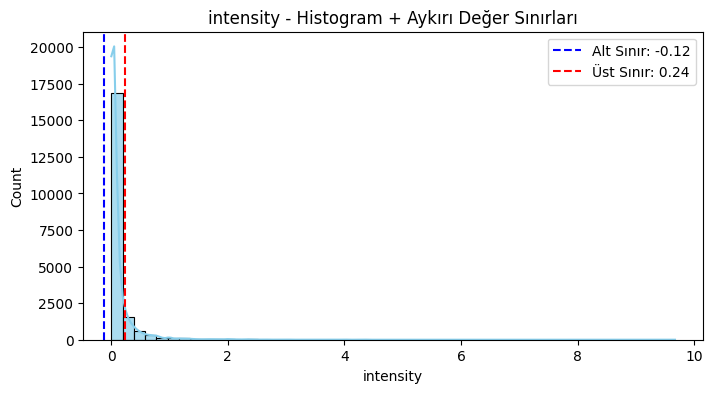


▶ intensity: 2499 aykırı değer bulundu.
Örnek aykırı değerler: [1.42857143 8.         0.32       0.77777778 0.25714286 1.25
 0.38461538 1.85714286 0.8        0.83333333] ...



In [ ]:
#AYKIRI DEĞER ANALİZİ
def outlier_thresholds(df_copy, col):
    Q1 = df_copy[col].quantile(0.25)
    Q3 = df_copy[col].quantile(0.75)
    IQR = Q3 - Q1
    low = Q1 - 1.5 * IQR
    high = Q3 + 1.5 * IQR
    return low, high

def check_outliers(df_copy, col):
    low, high = outlier_thresholds(df_copy, col)
    outliers = df_copy[(df_copy[col] < low) | (df_copy[col] > high)][col]
    return outliers, low, high

def visualize_outliers_hist(df_copy):
    numeric_cols = df_copy.select_dtypes(include=["int64", "float64"]).columns

    for col in numeric_cols:
        outliers, low, high = check_outliers(df_copy, col)

        plt.figure(figsize=(8,4))
        # Histogram + KDE
        sns.histplot(df_copy[col], bins=50, kde=True, color="skyblue", alpha=0.7)

        # Alt ve üst sınır çizgileri
        plt.axvline(low, color="blue", linestyle="--", label=f"Alt Sınır: {low:.2f}")
        plt.axvline(high, color="red", linestyle="--", label=f"Üst Sınır: {high:.2f}")

        plt.title(f"{col} - Histogram + Aykırı Değer Sınırları")
        plt.legend()
        plt.show()

        print(f"\n▶ {col}: {len(outliers)} aykırı değer bulundu.")
        if not outliers.empty:
            print(f"Örnek aykırı değerler: {outliers.values[:10]} ...\n")

# Kullanım
visualize_outliers_hist(df_copy)

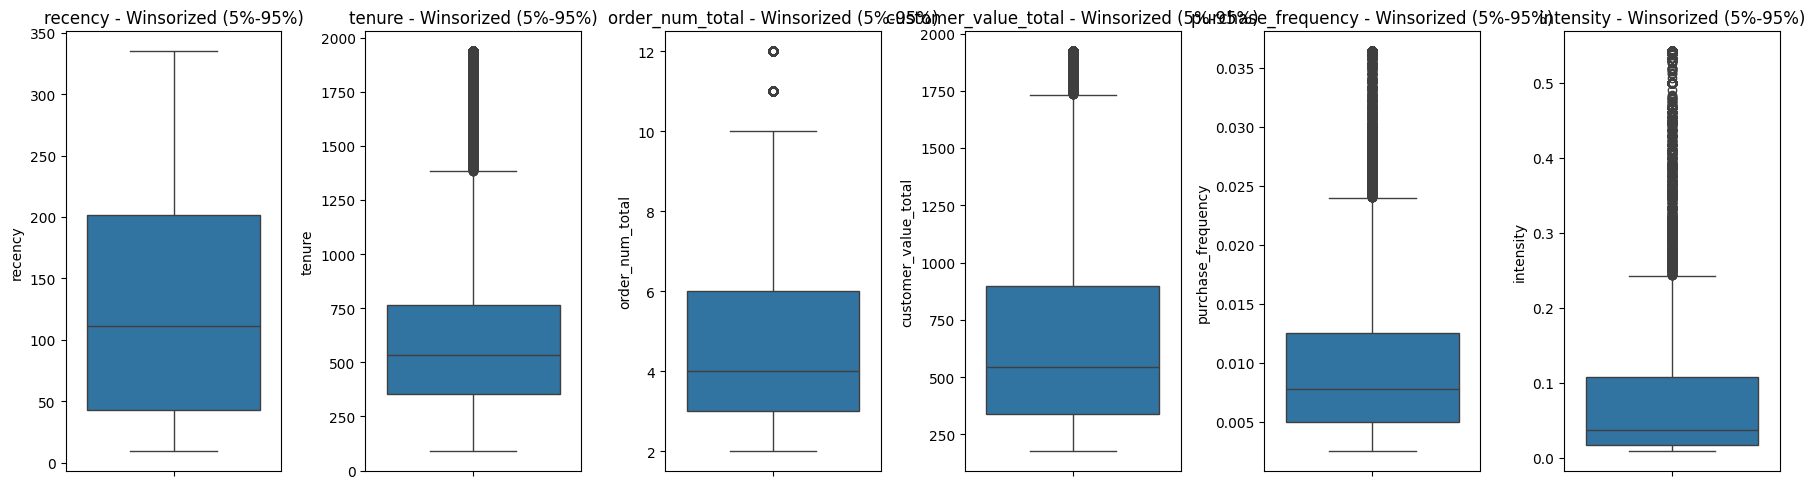

In [ ]:
# Tüm sayısal sütunlar
num_cols = df_copy.select_dtypes(include=["int64", "float64"]).columns

# Alt %5, üst %5 kırpma
for col in num_cols:
    df_copy[col] = winsorize(df_copy[col], limits=[0.05, 0.05])

# Görselleştirme
fig, axes = plt.subplots(1, len(num_cols), figsize=(18, 5))

for i, col in enumerate(num_cols):
    sns.boxplot(y=df_copy[col], ax=axes[i])
    axes[i].set_title(f"{col} - Winsorized (5%-95%)")

plt.tight_layout()
plt.show()

In [ ]:
model_df = df_copy.select_dtypes(include=["int64", "float64"])
model_df.head()

,recency,tenure,order_num_total,customer_value_total,purchase_frequency,intensity
0,95,119,5.00,939.37,0.04,0.05
1,105,1469,12.00,1921.94,0.01,0.20
2,186,366,5.00,585.32,0.01,0.03
3,135,88,2.00,175.48,0.04,0.01
4,86,582,2.00,209.98,0.00,0.02


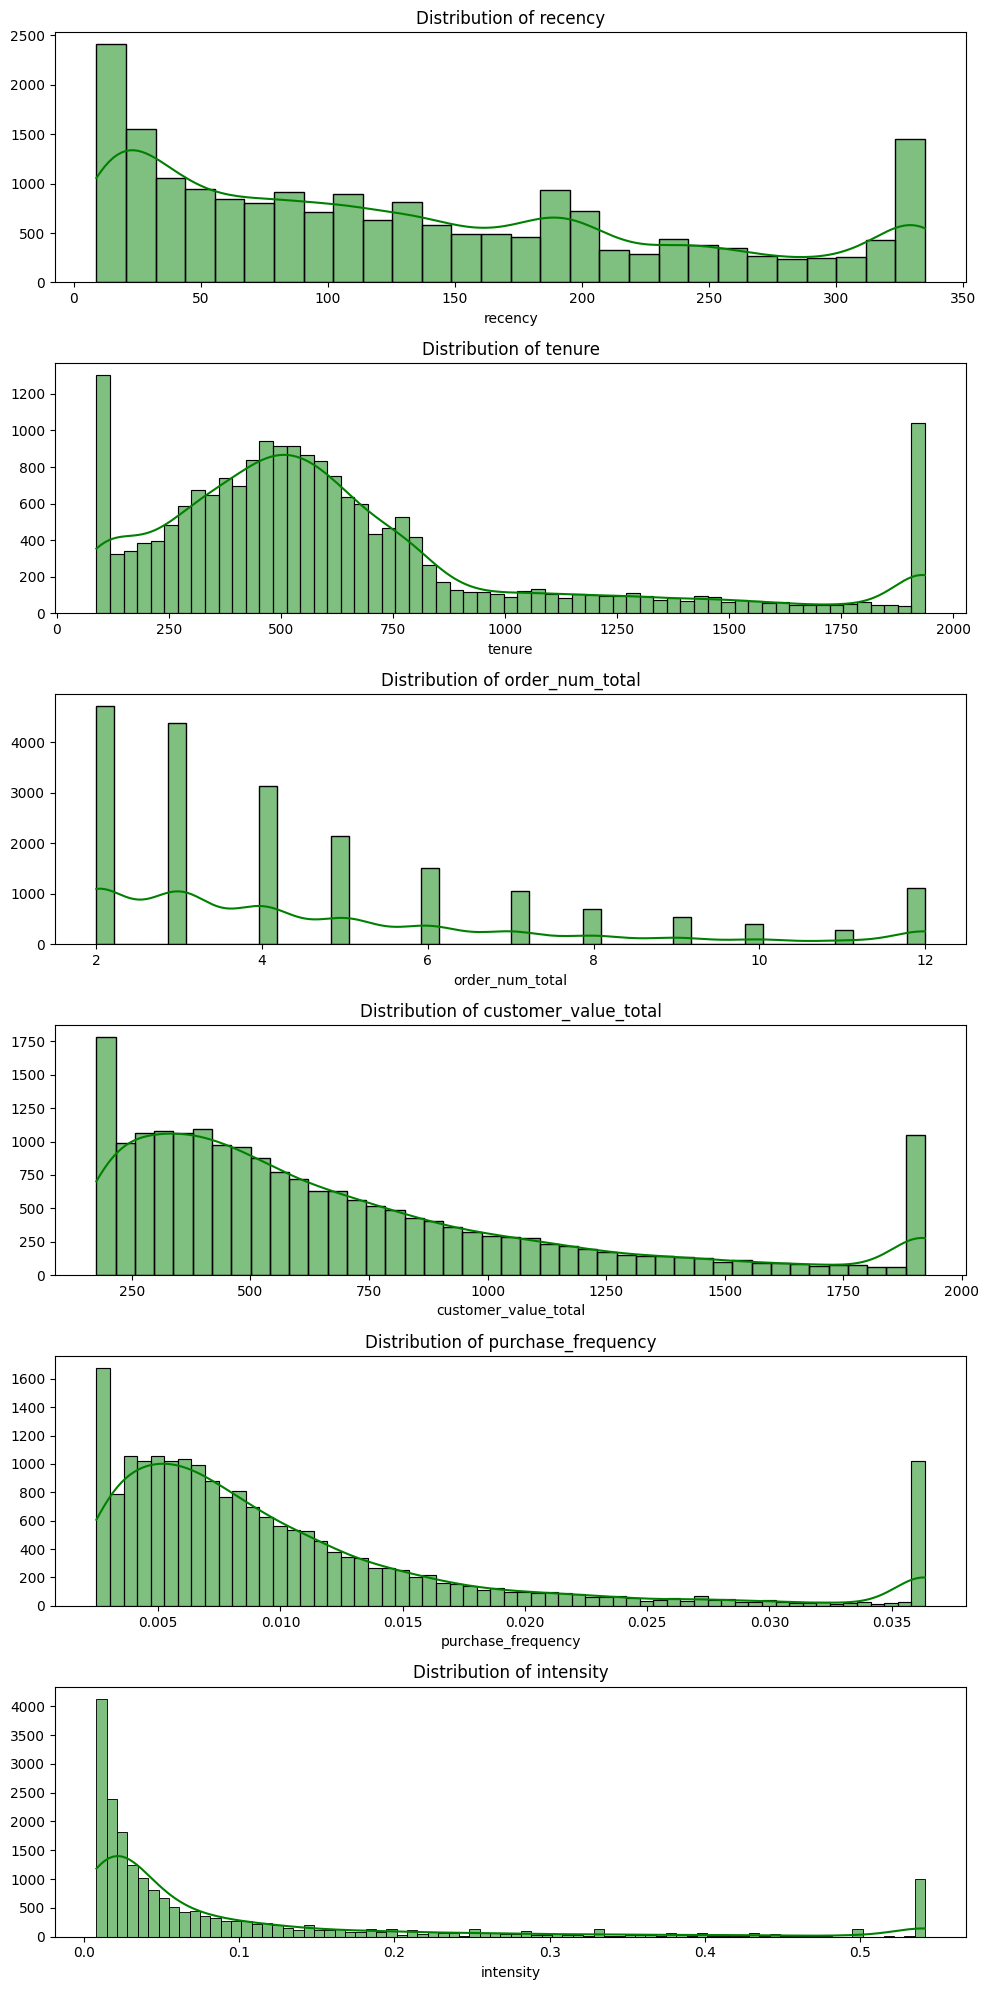

In [ ]:
#ÇARPIKLIK

# Sayısal sütunları seç
numeric_cols = model_df.columns

plt.figure(figsize=(10, 20))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.histplot(model_df[col], kde=True, color="green")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("")

plt.tight_layout()
plt.show()

In [ ]:
# Log dönüşümü (np.log1p sıfırlar için güvenlidir)
model_df = np.log1p(model_df)
model_df.head()

,recency,tenure,order_num_total,customer_value_total,purchase_frequency,intensity
0,4.56,4.79,1.79,6.85,0.04,0.05
1,4.66,7.29,2.56,7.56,0.01,0.18
2,5.23,5.91,1.79,6.37,0.01,0.03
3,4.91,4.49,1.10,5.17,0.04,0.01
4,4.47,6.37,1.10,5.35,0.00,0.02


In [ ]:
# StandardScaler ile ölçeklendirme (ortalama=0, varyans=1)
sc = StandardScaler()
model_scaling = sc.fit_transform(model_df)

# Tekrar DataFrame'e çeviriyoruz
model_df = pd.DataFrame(model_scaling, columns=model_df.columns)
model_df.head()


,recency,tenure,order_num_total,customer_value_total,purchase_frequency,intensity
0,0.06,-1.94,0.37,0.79,3.05,-0.32
1,0.16,1.42,2.12,1.88,0.45,0.82
2,0.71,-0.44,0.37,0.07,0.37,-0.54
3,0.40,-2.34,-1.20,-1.75,3.05,-0.64
4,-0.03,0.18,-1.20,-1.48,-0.84,-0.57


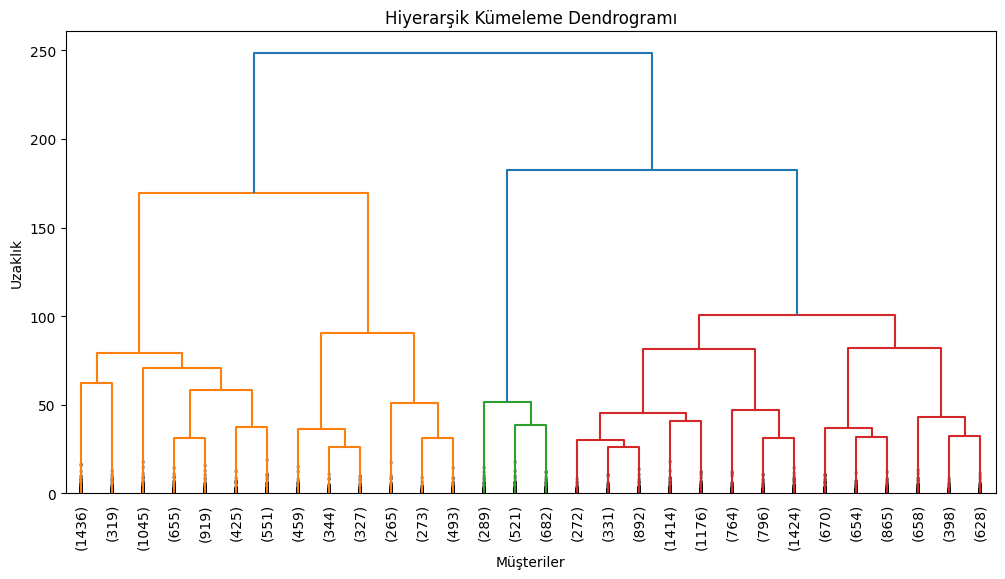

In [ ]:
# Linkage metodu: ward (en çok kullanılan yöntem, varyansı minimize eder)
linked = linkage(model_scaling, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode="lastp", p=30, leaf_rotation=90.,
           leaf_font_size=10., show_contracted=True)
plt.title("Hiyerarşik Kümeleme Dendrogramı")
plt.xlabel("Müşteriler")
plt.ylabel("Uzaklık")
plt.show()

In [ ]:
# Final dataframe
num_cols = df_copy.select_dtypes(include=["int64", "float64"])
final_df = pd.concat([df_copy[["master_id"]], num_cols], axis=1)

In [ ]:
# 4 küme olacak şekilde kesim
cluster_labels = fcluster(linked, 4, criterion='maxclust')

# Küme etiketlerini DataFrame'e ekleyelim
final_df["Cluster"] = cluster_labels

final_df.head()

,master_id,recency,tenure,order_num_total,customer_value_total,purchase_frequency,intensity,Cluster
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95,119,5.00,939.37,0.04,0.05,1
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105,1469,12.00,1921.94,0.01,0.20,1
2,69b69676-1a40-11ea-941b-000d3a38a36f,186,366,5.00,585.32,0.01,0.03,1
3,1854e56c-491f-11eb-806e-000d3a38a36f,135,88,2.00,175.48,0.04,0.01,3
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86,582,2.00,209.98,0.00,0.02,4


t: eşik değer.

'maxclust' → belirtilen sayıda küme oluşturur.

'distance' → belirtilen mesafe değerine göre dalları keser.

criterion='maxclust', t=4 → dendrogramı 4 kümeye böler.

criterion='distance', t=150 → dendrogramda 150 yükseklik çizgisi üzerinden böler, çıkan küme sayısı otomatik olur.

In [ ]:
final_df["Cluster"].value_counts()

,count
Cluster,
4,10942
1,5350
2,2161
3,1492


In [ ]:
# Modelde kullandığımız kolonlar
model_cols = model_df.columns.tolist()
model_cols

['recency',
 'tenure',
 'order_num_total',
 'customer_value_total',
 'purchase_frequency',
 'intensity']

In [ ]:
# Gruplama ve özet istatistik
summary = final_df.groupby("Cluster")[model_cols].agg(["mean", "min", "max"])
summary

recency          tenure           order_num_total             \
           mean min  max   mean min   max            mean  min   max   
Cluster                                                                
1        130.02  10  335 813.44  88  1937            7.57 3.00 12.00   
2         14.41   9  335 824.18  88  1937            6.36 2.00 12.00   
3        152.61   9  335 104.12  88   262            2.73 2.00  8.00   
4        156.77   9  335 614.96  93  1937            3.17 2.00 10.00   

        customer_value_total                purchase_frequency            \
                        mean    min     max               mean  min  max   
Cluster                                                                    
1                    1149.54 277.94 1921.94               0.01 0.00 0.04   
2                     980.13 175.48 1921.94               0.01 0.00 0.04   
3                     424.93 175.48 1725.38               0.03 0.01 0.04   
4                     446.98 175.48 1921.94               0.01 0.00 0.03   

        intensity            
             mean  min  max  
Cluster                      
1            0.11 0.01 0.54  
2            0.43 0.08 0.54  
3            0.05 0.01 0.54  
4            0.04 0.01 0.28

# Cluster 1

Recency (130 gün) → orta düzey, yani müşteriler bir süredir alışveriş yapmamış ama tamamen kopmamış.

Tenure (813 gün) → uzun süredir müşteri.

Order_num_total (7.57) → en yüksek sipariş ortalamasına sahip grup.

Customer_value_total (1149.5) → en değerli müşteri grubu.

Purchase_frequency (0.01) & Intensity (0.11) → sık alışveriş yapmıyorlar ama yüksek sipariş sayısı toplamda değerli kılıyor.

!!Sadık ve değerli müşteriler. Uzun süredir birlikte olan, çok sipariş vermiş ama alışveriş sıklığı düşük. Yeniden aktifleştirme kampanyası faydalı olabilir.

# Cluster 2

Recency (14 gün) → en düşük, yani çok yakın zamanda alışveriş yapmışlar → **en aktif müşteri grubu.**

Tenure (824 gün) → uzun süredir müşteri.

Order_num_total (6.36) → yüksek sipariş sayısı.

Customer_value_total (980.1) → oldukça değerli.

Purchase_frequency (0.01), Intensity (0.43) → diğer kümelere kıyasla en yüksek yoğunluk.

!!Aktif, sadık ve yüksek değerli müşteri grubu. En kârlı grup. Sadakat programları, özel kampanyalar ile mutlaka korunmalı.

# Cluster 3

Recency (152 gün) → yüksek, yani uzun süredir alışveriş yapmayan grup.

Tenure (104 gün) → kısa süreli müşteri → **yeni müşteriler**.

Order_num_total (2.73) → en düşük sipariş sayısı.

Customer_value_total (424.9) → en düşük müşteri değeri.

Purchase_frequency (0.03), Intensity (0.05) → alışveriş frekansı düşük.

!!Yeni gelen ama alışverişi bırakmış veya çok az alışveriş yapmış müşteriler. Kaybolma riski yüksek. Onboarding kampanyaları, indirimler ile yeniden kazanılmalı.

# Cluster 4

Recency (156 gün) → en yüksek, yani en uzun süredir alışveriş yapmayanlar.

Tenure (614 gün) → uzun süredir müşteri, ama artık alışveriş yapmıyor.

Order_num_total (3.17) → düşük sipariş sayısı.

Customer_value_total (446.9) → düşük değerli.

Purchase_frequency (0.01), Intensity (0.04) → çok düşük alışveriş yoğunluğu.

!!Uzun süredir müşteri ama alışverişi bırakmış → kaybedilmiş müşteri grubu. Yeniden kazanma (reactivation) stratejileri denenebilir, ama maliyet yüksekse bu grubu bırakmak da düşünülebilir.

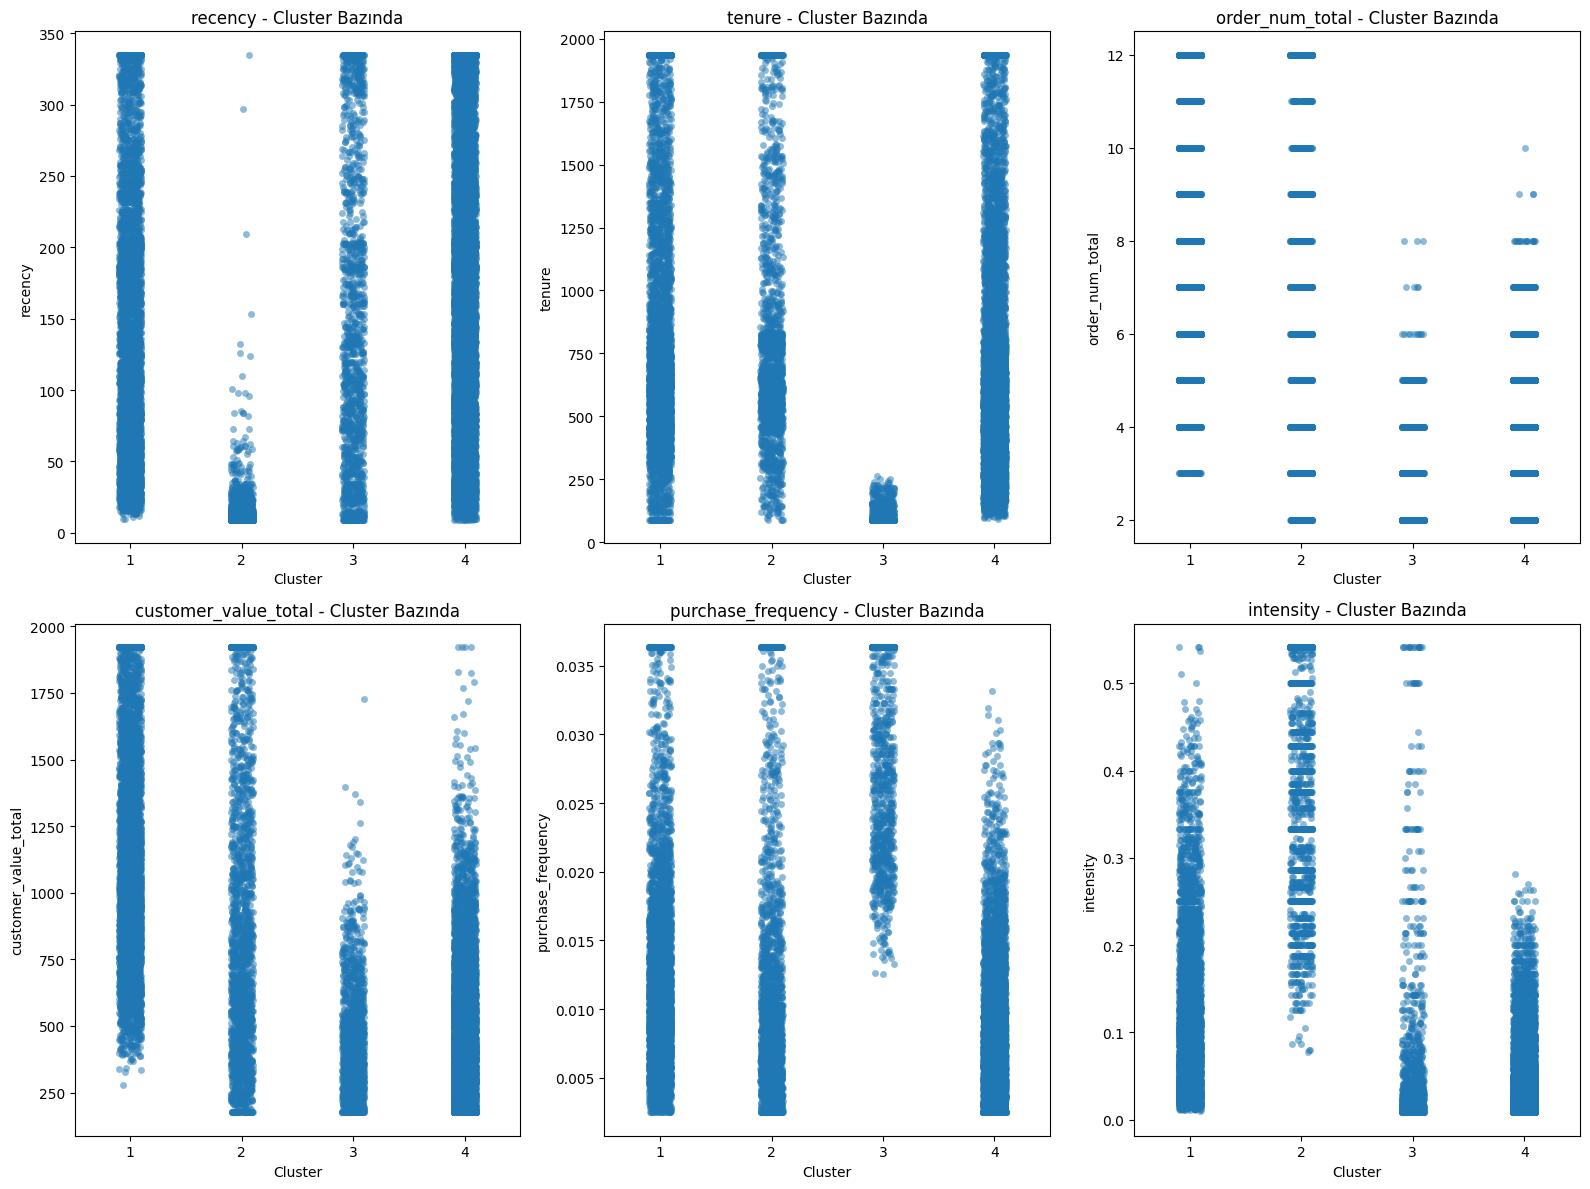

In [ ]:
num_cols = df_copy.select_dtypes(include=["int64", "float64"])

plt.figure(figsize=(16, 12))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.stripplot(x="Cluster", y=col, data=final_df, jitter=True, alpha=0.5)
    plt.title(f"{col} - Cluster Bazında")
    plt.xlabel("Cluster")
    plt.ylabel(col)

plt.tight_layout()
plt.show()

# **Cluster 1:** Yüksek değerli ama alışveriş sıklığı düşük (yeniden aktifleştirilmeli).

# **Cluster 2:** En değerli → aktif & sadık müşteriler (korunmalı).

# **Cluster 3:** Yeni müşteriler, düşük harcama (potansiyel geliştirilmeli).

# **Cluster 4:** Uzun süredir alışveriş yapmayan, düşük değerli (kaybedilmiş müşteri).